In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
np.random.seed(12)

returns = np.random.normal(0.0005, 0.01, 252)
returns = pd.Series(returns)
price = (1 + returns).cumprod() * 100

MA20 =  pd.Series(price).rolling(20).mean()
roll_vol = returns.rolling(20).std() * np.sqrt(252)

trend = (price > MA20).astype(int)

vol_regime = (roll_vol < roll_vol.median()).astype(int)

alloc = []

for t,v in zip(trend, vol_regime):
  if t==1 and v==1:
    alloc.append(1.0)
  elif t==1 and v==0:
    alloc.append(0.5)
  elif t==0 and v==1:
    alloc.append(0.2)
  else:
    alloc.append(0)

alloc = pd.Series(alloc)


strategy_returns = returns * alloc.shift(1)
strategy_cum = (1 + strategy_returns.fillna(0)).cumprod()

def max_drawdown(series):
  peak = series.cummax()
  drawdown = (series - peak) / peak
  return drawdown.min()

sharpe = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
mdd = max_drawdown(strategy_cum)
final_value = strategy_cum.iloc[-1]

print(f"Final Value: {final_value:.4f}")
print(f"Sharpe Ratio: {sharpe:.4f}")
print(f"Max Drawdown: {mdd:.4f}")

Final Value: 0.8557
Sharpe Ratio: -1.9507
Max Drawdown: -0.1529


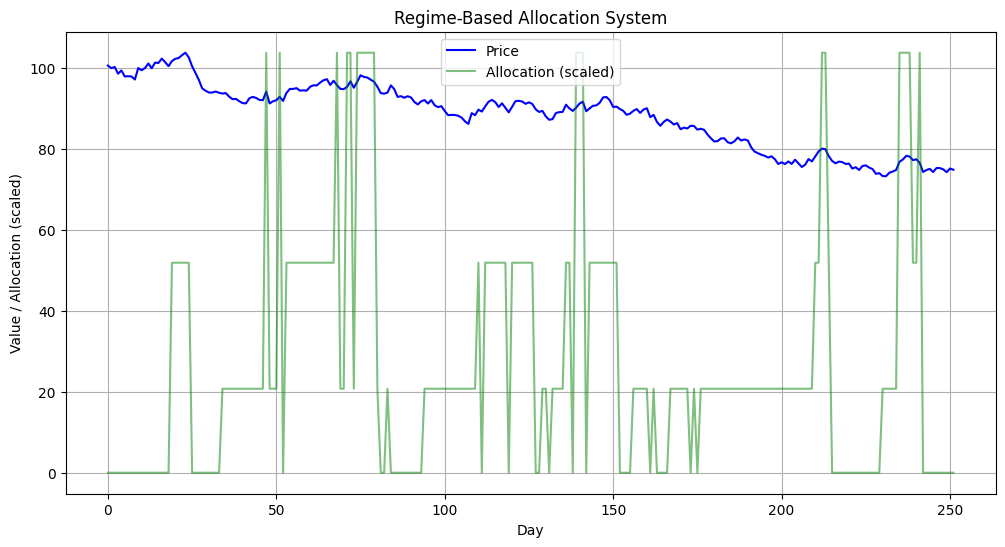

In [9]:

plt.figure(figsize=(12,6))

plt.plot(price, label="Price", color="blue")
plt.plot(alloc * price.max(), label="Allocation (scaled)", color="green", alpha=0.5)

plt.title("Regime-Based Allocation System")
plt.xlabel("Day")
plt.ylabel("Value / Allocation (scaled)")
plt.legend()
plt.grid(True)
plt.show()